In [1]:
from dateutil import tz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df = pd.read_csv('clean/reporte_consolidado.csv', index_col=0)

In [3]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%Y-%m-%d %H:%M:%S", exact=True)

In [4]:
df.head()

,Fecha,Ciudad,Tipo_Enlace,Traffic
0,2020-09-01,Alausi,B,0.00
1,2020-09-01,Alausi,P,0.32
2,2020-09-01,Ambato,B,7.49
3,2020-09-01,Ambato,P,5.86
4,2020-09-01,Atuntaqui,B,1.06


## Visualizacion de evolución de todo el tráfico

In [5]:
total = df.groupby("Fecha").sum().reset_index()
total.head()

,Fecha,Traffic
0,2019-04-01 00:00:00,325.73
1,2019-04-01 02:00:00,150.55
2,2019-04-01 04:00:00,75.77
3,2019-04-01 06:00:00,141.11
4,2019-04-01 08:00:00,204.81


In [6]:
monthly = total.groupby(pd.Grouper(key='Fecha',freq='MS')).max().reset_index()

In [7]:
sns.set_style('darkgrid')

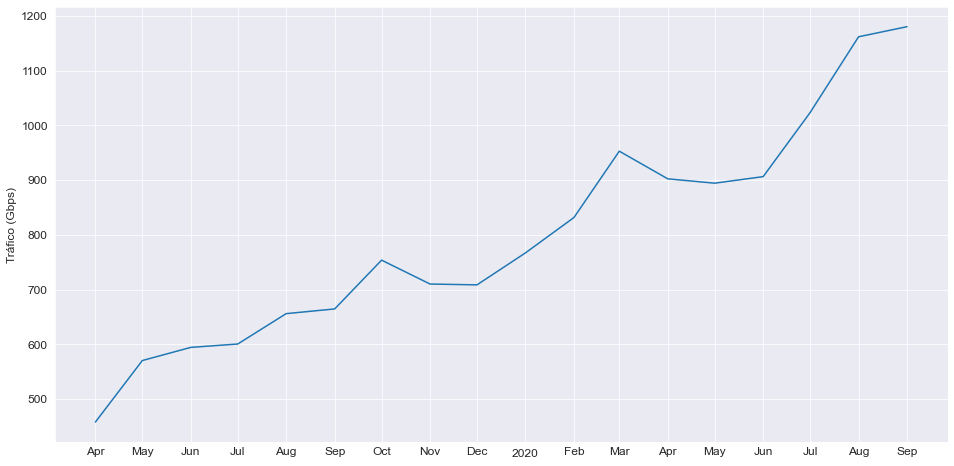

In [8]:
fig,ax = plt.subplots(figsize=(16,8))
_ = sns.lineplot(data=monthly, x="Fecha", y="Traffic", ax=ax, markers=True)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))

ax.tick_params(axis='both', which='minor', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("Tráfico (Gbps)", fontsize=12)
plt.grid(b=True,which='both',axis='both')


## Visualización de tráfico por tipo Principal/Backup

In [9]:
xtipo = df.groupby(["Fecha","Tipo_Enlace"]).sum().reset_index()

In [10]:
xtipo.head()

,Fecha,Tipo_Enlace,Traffic
0,2019-04-01 00:00:00,B,41.30
1,2019-04-01 00:00:00,P,284.43
2,2019-04-01 02:00:00,B,19.94
3,2019-04-01 02:00:00,P,130.61
4,2019-04-01 04:00:00,B,9.81


In [11]:
xtipo_monthly = xtipo.groupby([pd.Grouper(key='Fecha',freq='MS'),"Tipo_Enlace"]).max().reset_index()

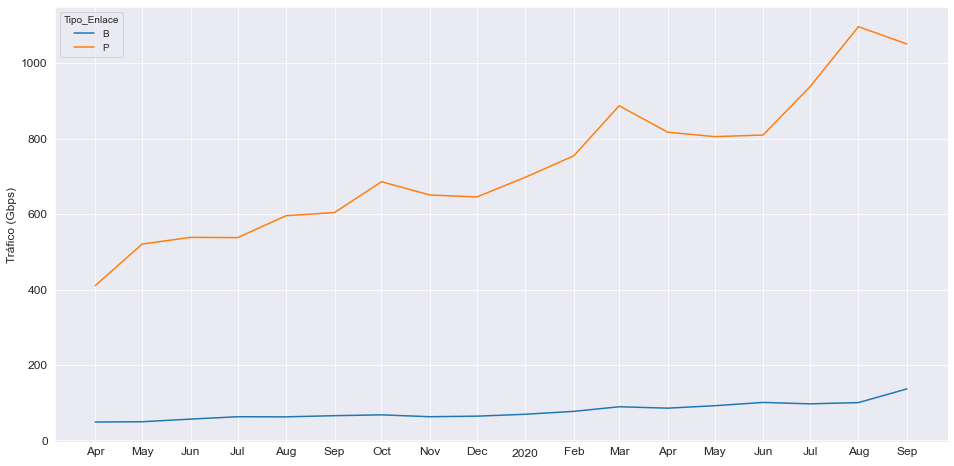

In [12]:
fig,ax = plt.subplots(figsize=(16,8))
_ = sns.lineplot(data=xtipo_monthly, x="Fecha", y="Traffic", ax=ax, markers=True, hue="Tipo_Enlace")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))

ax.tick_params(axis='both', which='minor', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("Tráfico (Gbps)", fontsize=12)
plt.grid(b=True,which='both',axis='both')

## Visualización de todo el tráfico dia vs noche (Usando promedio)

In [13]:
df.head()

,Fecha,Ciudad,Tipo_Enlace,Traffic
0,2020-09-01,Alausi,B,0.00
1,2020-09-01,Alausi,P,0.32
2,2020-09-01,Ambato,B,7.49
3,2020-09-01,Ambato,P,5.86
4,2020-09-01,Atuntaqui,B,1.06


In [14]:
def parse_date(row):
    #print(row.hour)
    if row.hour >= 18 or (row.hour >= 0 and row.hour <= 2):
        return "Noche"
    elif row.hour > 14:
        return "Tarde"
    elif row.hour >= 6 and row.hour <=14:
        return "Dia"
    elif row.hour > 2:
        return "Madrugada"

In [15]:
df['Horario'] = df['Fecha'].apply(parse_date)

In [16]:
df.head()

,Fecha,Ciudad,Tipo_Enlace,Traffic,Horario
0,2020-09-01,Alausi,B,0.00,Noche
1,2020-09-01,Alausi,P,0.32,Noche
2,2020-09-01,Ambato,B,7.49,Noche
3,2020-09-01,Ambato,P,5.86,Noche
4,2020-09-01,Atuntaqui,B,1.06,Noche


In [17]:
xhorario = df.groupby(["Fecha","Horario"]).sum().reset_index()
xhorario[xhorario['Fecha']>="2020-09-29"].head(12)

,Fecha,Horario,Traffic
6564,2020-09-29 00:00:00,Noche,693.05
6565,2020-09-29 02:00:00,Noche,299.76
6566,2020-09-29 04:00:00,Madrugada,195.77
6567,2020-09-29 06:00:00,Dia,582.33
6568,2020-09-29 08:00:00,Dia,776.33
6569,2020-09-29 10:00:00,Dia,833.54
6570,2020-09-29 12:00:00,Dia,856.20
6571,2020-09-29 14:00:00,Dia,934.42
6572,2020-09-29 16:00:00,Tarde,961.17
6573,2020-09-29 18:00:00,Noche,1010.67


In [18]:
xhorario_monthly = xhorario.groupby([pd.Grouper(key='Fecha',freq='MS'),"Horario"]).mean().reset_index()
xhorario_monthly = xhorario_monthly[(xhorario_monthly['Horario'] == "Dia") | (xhorario_monthly['Horario'] == "Noche")]

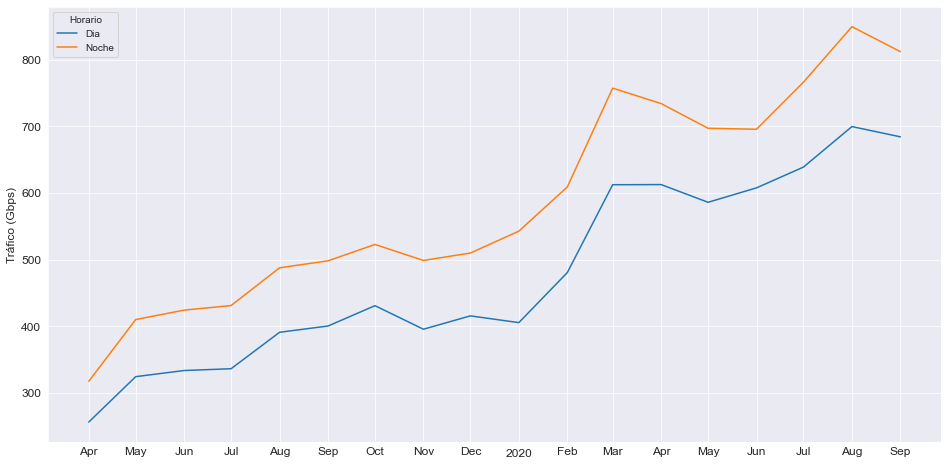

In [19]:
fig,ax = plt.subplots(figsize=(16,8))
_ = sns.lineplot(data=xhorario_monthly, x="Fecha", y="Traffic", ax=ax, markers=True, hue="Horario")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))

ax.tick_params(axis='both', which='minor', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("Tráfico (Gbps)", fontsize=12)
plt.grid(b=True,which='both',axis='both')

## Visualización por ciudades en promedio donde se ha usado más los Backups

In [22]:
backups = df[df['Tipo_Enlace']=='B']
backups

,Fecha,Ciudad,Tipo_Enlace,Traffic,Horario
0,2020-09-01 00:00:00,Alausi,B,0.00,Noche
2,2020-09-01 00:00:00,Ambato,B,7.49,Noche
4,2020-09-01 00:00:00,Atuntaqui,B,1.06,Noche
6,2020-09-01 00:00:00,Babahoyo,B,1.87,Noche
8,2020-09-01 00:00:00,Balsas,B,0.00,Noche
...,...,...,...,...,...
34184,2019-04-30 22:00:00,Tena,B,0.29,Noche
34186,2019-04-30 22:00:00,Tonsupa,B,0.15,Noche
34188,2019-04-30 22:00:00,Tulcan,B,0.24,Noche
34196,2019-04-30 22:00:00,Vinces,B,0.40,Noche


In [41]:
backups_x_ciudad = backups.groupby(['Ciudad',pd.Grouper(key='Fecha',freq='M')]).mean().reset_index()
backups_x_ciudad

,Ciudad,Fecha,Traffic
0,Alausi,2020-06-30,0.000000
1,Alausi,2020-07-31,0.000000
2,Alausi,2020-08-31,0.000000
3,Alausi,2020-09-30,0.000000
4,Ambato,2019-04-30,1.731028
...,...,...,...
877,Zaruma,2020-05-31,0.000000
878,Zaruma,2020-06-30,0.000000
879,Zaruma,2020-07-31,0.000000
880,Zaruma,2020-08-31,0.000000


In [79]:
# Pivotear las fechas a columnas
heat_backup = backups_x_ciudad.pivot(index="Ciudad",columns=["Fecha"],values="Traffic").reset_index()
heat_backup = heat_backup.iloc[:,0:]
heat_backup = heat_backup.fillna(0)
# Ordeno y obtengo el top 15 de Ciudades
heat_backup["Max"] = heat_backup.max(axis=1)
heat_backup = heat_backup.sort_values("Max",ascending=False)
heat_backup = heat_backup.iloc[:15,:]
heat_backup = heat_backup.set_index('Ciudad')
heat_backup.columns = ["Abr 2019","May 2019","Jun 2019","Jul 2019","Ago 2019","Sep 2019","Oct 2019","Nov 2019","Dic 2019","Ene 2020","Feb 2020","Mar 2020","Abr 2020","May 2020","Jun 2020","Jul 2020","Ago 2020","Sep 2020","Max"]
heat_backup.drop(columns=["Max"], inplace=True)
heat_backup

,Abr 2019,May 2019,Jun 2019,Jul 2019,Ago 2019,Sep 2019,Oct 2019,Nov 2019,Dic 2019,Ene 2020,Feb 2020,Mar 2020,Abr 2020,May 2020,Jun 2020,Jul 2020,Ago 2020,Sep 2020
Ciudad,,,,,,,,,,,,,,,,,,
Ambato,1.731028,1.804274,1.978278,2.130511,2.248952,2.285083,2.596398,2.333556,2.448172,2.484839,2.786236,4.061183,4.767444,4.711156,4.979972,5.578306,5.706505,6.113444
Salinas,3.802250,3.439409,3.472528,4.100511,4.242688,4.525528,4.485296,4.063056,3.804489,4.228522,4.998247,4.893253,5.453056,5.457769,5.472833,5.986478,5.825618,6.038250
Manta,3.174750,3.351694,3.577472,3.832984,3.988065,4.189167,4.116586,3.675028,3.830645,4.343118,5.211293,5.385296,5.981972,5.732527,5.755611,4.963656,3.081505,4.506944
Portoviejo,3.398222,3.451317,3.759500,4.221129,4.805269,4.918889,5.063548,4.927000,4.645403,4.473602,5.323937,5.747823,5.305361,5.325780,5.181889,4.760753,4.103548,4.001000
Qvdo,1.897972,1.862527,2.310861,2.541371,2.728925,2.851611,2.910027,2.770556,2.873817,3.109328,3.839655,5.171210,5.526000,5.200538,4.950611,5.375726,5.676290,5.741556
Ibarra,2.057306,2.119946,2.202444,2.447285,2.453011,2.466694,2.639194,2.564694,2.903898,3.042419,3.623879,4.470565,4.544083,4.699113,4.596667,5.003844,5.606156,5.678250
Cuenca,1.186139,1.162581,1.206667,1.574919,1.679409,1.816306,2.032473,1.779972,1.929597,2.176855,2.509167,3.470242,3.639000,3.690860,3.820583,4.102984,4.486747,4.788083
Riobamba,3.745750,3.960376,4.399139,4.560941,4.008441,1.664583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.225806,3.130538,3.356747,3.852611
Stodomingo,1.831361,1.745618,1.927083,2.042903,2.248925,2.296417,2.481882,2.360083,2.465108,2.494435,2.865402,3.533306,3.463722,3.479543,3.576889,3.376801,3.686667,4.506500


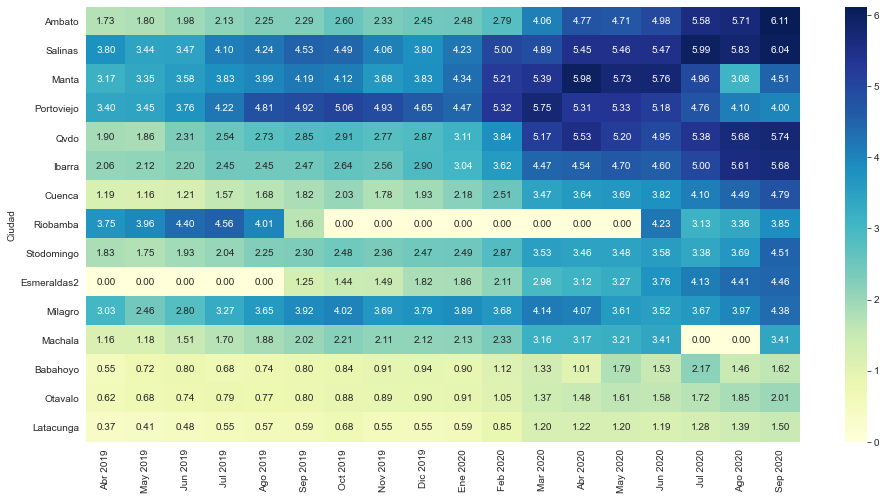

In [83]:
fig,ax = plt.subplots(figsize=(16,8))
_ = sns.heatmap(heat_backup, ax=ax, annot=True, fmt=".2f", cmap="YlGnBu")


## Ciudades que mas consumen (Principal y Backup)

In [113]:
# Sumar principales y backup
ciudades = df[['Ciudad','Fecha','Tipo_Enlace','Traffic']].groupby(['Ciudad','Fecha']).sum().reset_index()
# Promedia el mes
ciudades = ciudades.groupby(['Ciudad',pd.Grouper(key="Fecha",freq="M")]).mean().reset_index()
ciudades = ciudades.sort_values("Traffic",ascending=False)

In [120]:
# Top de ciudades en Marzo 2020
ciudades_marzo = ciudades[ciudades['Fecha']=='2020-03-31']
ciudades_marzo = ciudades_marzo.iloc[:15,:]
ciudades_marzo
# Top de ciudades en Octubre 2019
ciudades_oct = ciudades[ciudades['Fecha']=='2019-10-31']
ciudades_oct = ciudades_oct.iloc[:15,:]
ciudades_oct

,Ciudad,Fecha,Traffic
379,Gyes,2019-10-31,69.127903
1061,Uios,2019-10-31,50.761210
325,Gyei,2019-10-31,50.413360
1007,Uiod,2019-10-31,43.203306
289,Gyea,2019-10-31,32.367581
1025,Uiog,2019-10-31,28.872151
971,Uioa,2019-10-31,19.543817
361,Gyem,2019-10-31,17.935645
989,Uiob,2019-10-31,15.950161
343,Gyek,2019-10-31,15.201478


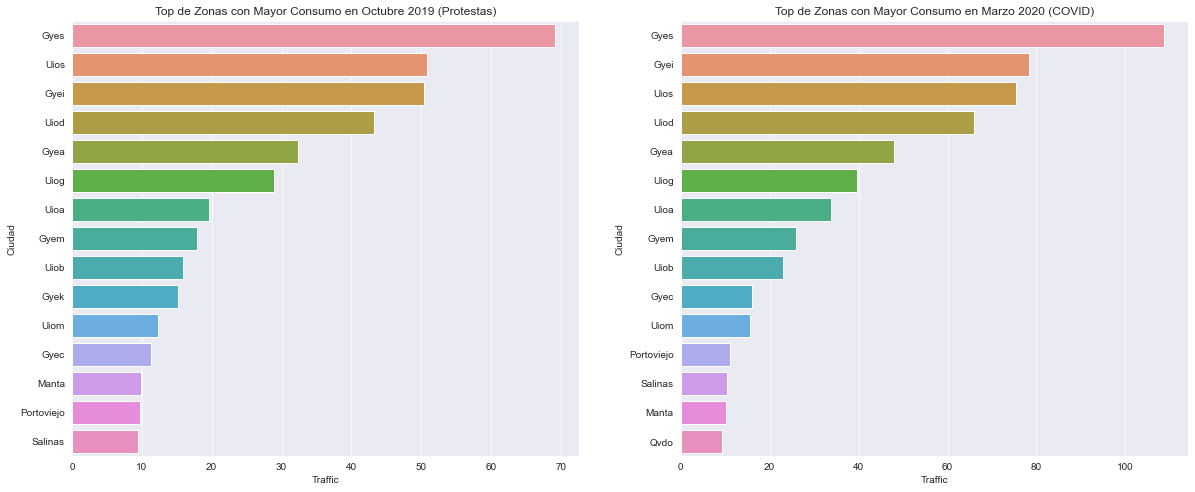

In [126]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(data=ciudades_marzo,y='Ciudad',x='Traffic',orient='h', ax=ax[1])
sns.barplot(data=ciudades_oct,y='Ciudad',x='Traffic',orient='h', ax=ax[0])
_ = ax[1].set_title("Top de Zonas con Mayor Consumo en Marzo 2020 (COVID)")
_ = ax[0].set_title("Top de Zonas con Mayor Consumo en Octubre 2019 (Protestas)")

In [ ]:
# TODO colocar Titulos y unidades en gráficas
# TODO cambiar columnas gyea por Guayaquil-Aurora etc.
# TODO crear nueva variable categorica de region y comparar